# Checking how to curve fit in pyarpes

starging from the review of test/test_curve_fit.py

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import arpes.config
from arpes.io import example_data
from arpes.analysis import rebin
from arpes.fits import AffineBroadenedFD, broadcast_model

Activating auto-logging. Current session state plus future input saved.
Filename       : logs/Checking_curve_fit_2024-04-30_00-01-29.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


The former part of the test_broadcast_fitting, which is sufficient to check how it works.
```python
cut = example_data.cut.spectrum
near_ef = cut.isel(phi=slice(80, 120)).sel(eV=slice(-0.2, 0.1))
near_ef = rebin(near_ef, phi=5)

fit_results = broadcast_model([AffineBroadenedFD], near_ef, "phi", progress=False)
```

In [3]:
cut = example_data.cut.spectrum
near_ef = cut.isel(phi=slice(80, 120)).sel(eV=slice(-0.2, 0.15))
near_ef_rebin = rebin(near_ef, phi=5)

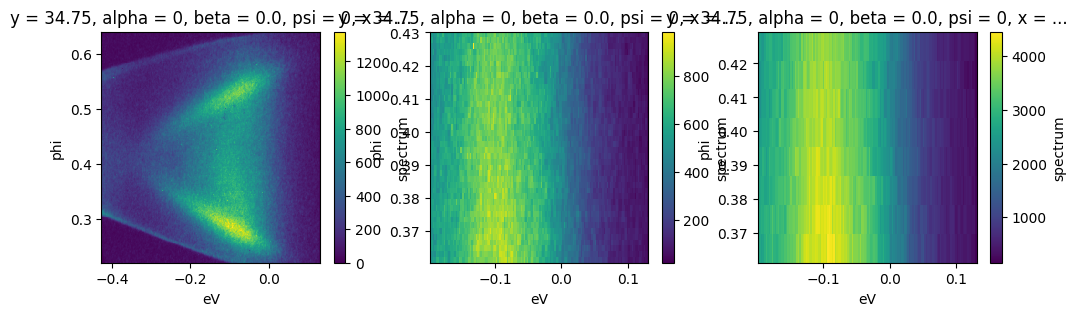

In [4]:
fig = plt.figure(figsize=(12,3))
ax1= fig.add_subplot(131)
cut.S.plot(ax=ax1)
ax2 =fig.add_subplot(132)
near_ef.S.plot(ax=ax2)
ax3 =fig.add_subplot(133)
near_ef_rebin.S.plot(ax=ax3)

In [5]:
fit_results = broadcast_model([AffineBroadenedFD], near_ef_rebin, "phi", progress=False)

In [6]:
fit_results.residual

<xarray.DataArray 'residual' (phi: 8, eV: 142)> Size: 9kB
array([[ 24,  28, 184, ...,  29,  49, 163],
       [102,  64, -45, ..., -23, -42, 143],
       [-31,  23, -38, ...,  37, -20, 123],
       ...,
       [ 54, 240,  26, ..., -67, -13, 163],
       [-29,  31, -47, ...,  52,  36, 143],
       [100, -24, 129, ..., -46,  32, 175]])
Coordinates:
    y        float64 8B 34.75
    alpha    int64 8B 0
    beta     float64 8B 0.0
    psi      int64 8B 0
    x        float64 8B -0.7704
    hv       float64 8B 5.93
    chi      float64 8B -0.1091
    z        float64 8B -3.4e-05
    theta    float64 8B 0.0
  * phi      (phi) float64 64B 0.3655 0.374 0.3826 ... 0.4081 0.4166 0.4251
  * eV       (eV) float64 1kB -0.1977 -0.1953 -0.193 ... 0.1256 0.1279 0.1302

In [7]:
fit_results.F.parameter_names

{'a_const_bkg',
 'a_conv_width',
 'a_fd_center',
 'a_fd_width',
 'a_lin_bkg',
 'a_offset'}

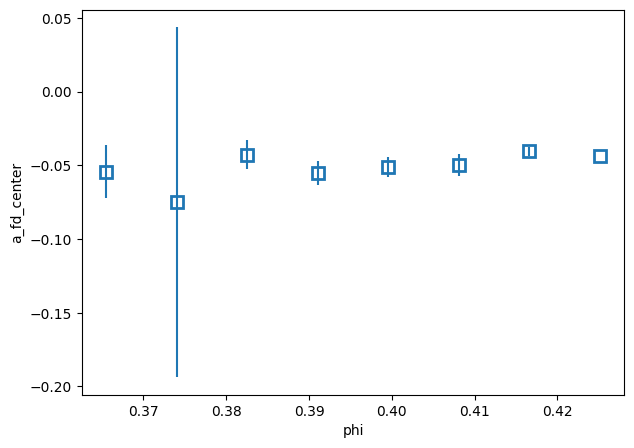

In [8]:
fit_results.F.plot_param("a_fd_center")

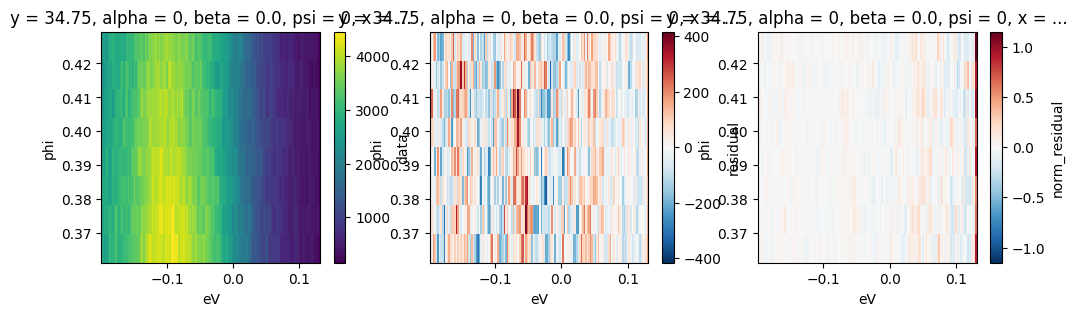

In [9]:
# fit_results.data is the data for fitting (measurement spectra)
fig = plt.figure(figsize=(12, 3))

ax1 = fig.add_subplot(131)
fit_results.data.S.plot(ax=ax1)
ax3 = fig.add_subplot(132)
fit_results.residual.S.plot(ax=ax3)
ax4 = fig.add_subplot(133)
fit_results.norm_residual.S.plot(ax=ax4)

In [10]:
fit_results.F.parameter_names

{'a_const_bkg',
 'a_conv_width',
 'a_fd_center',
 'a_fd_width',
 'a_lin_bkg',
 'a_offset'}

In [11]:
sp6 = fit_results.results[6].item()
sp6

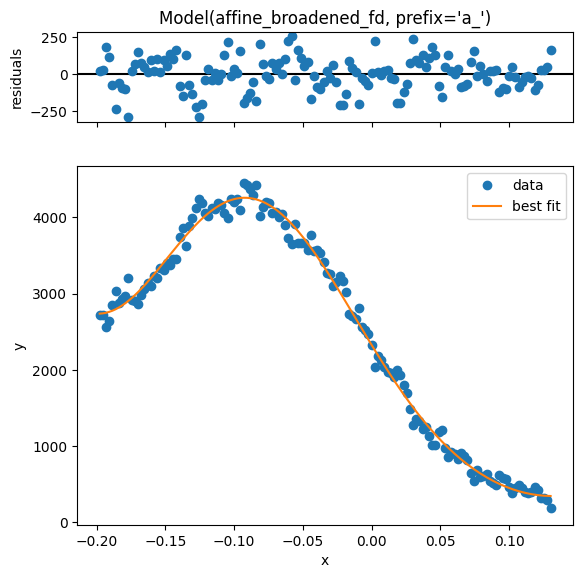

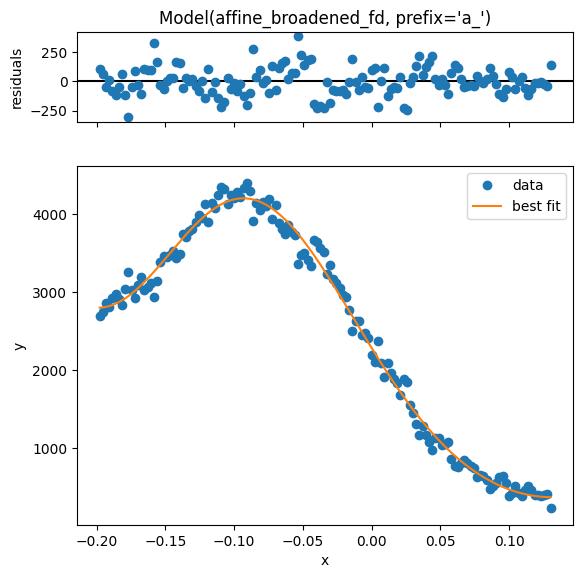

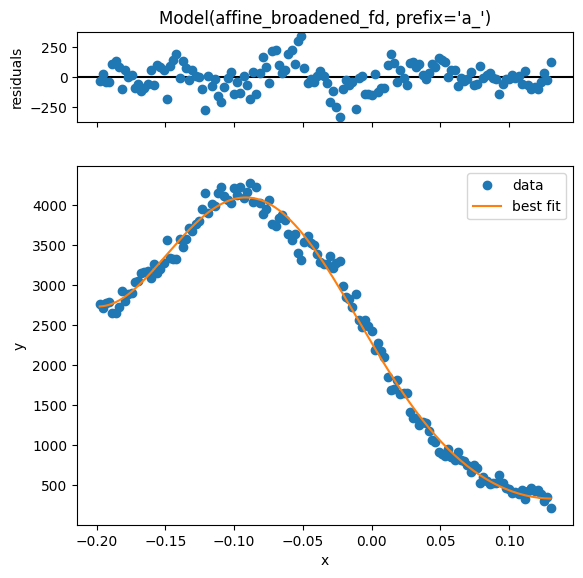

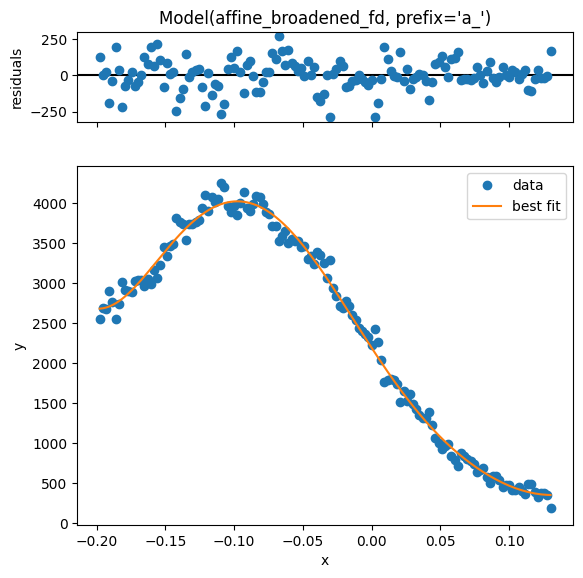

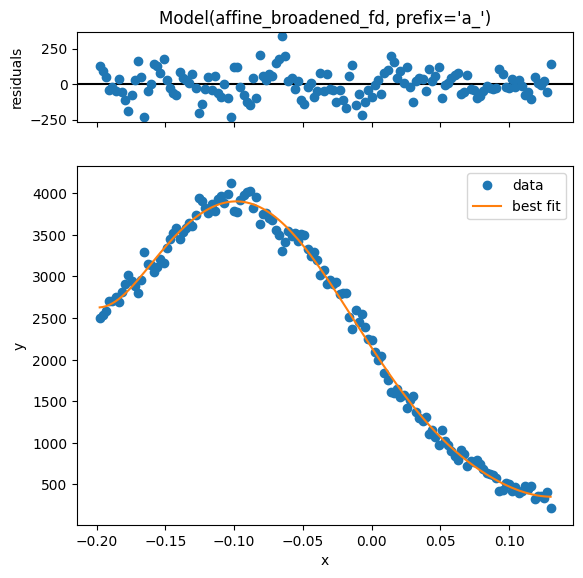

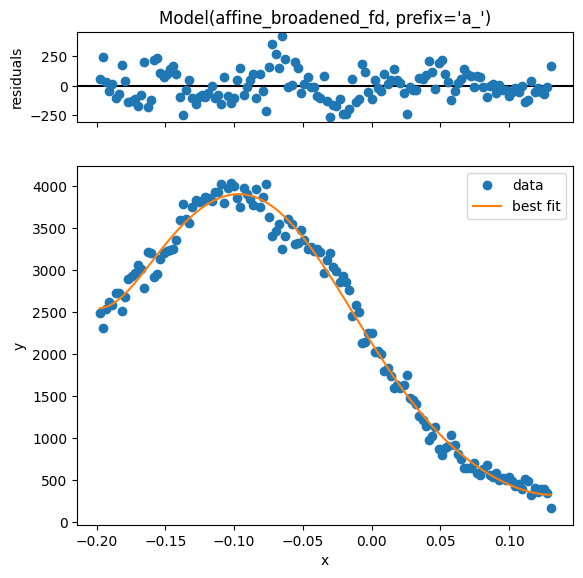

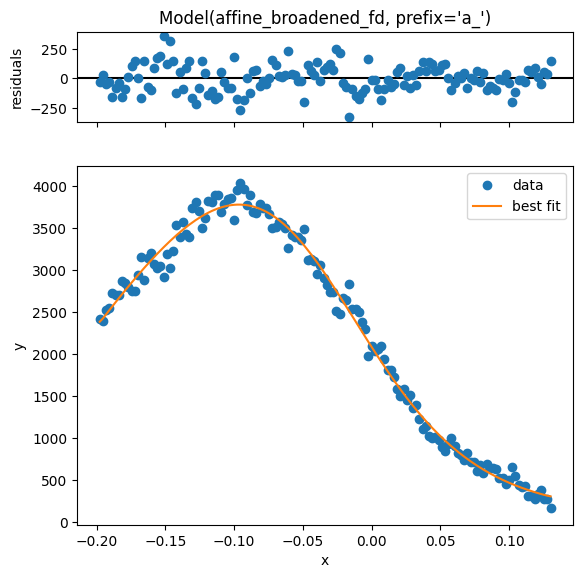

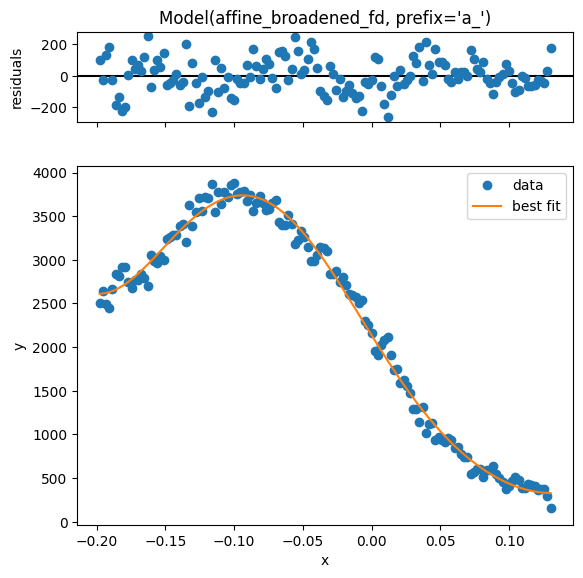

In [12]:
for i in fit_results.results:
    i.item().plot()

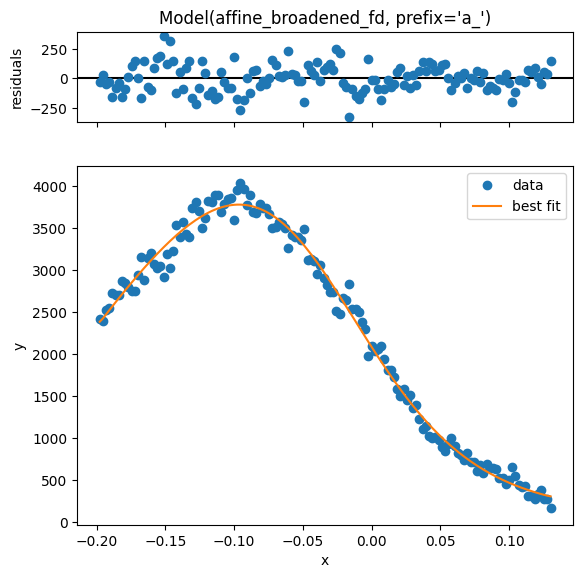

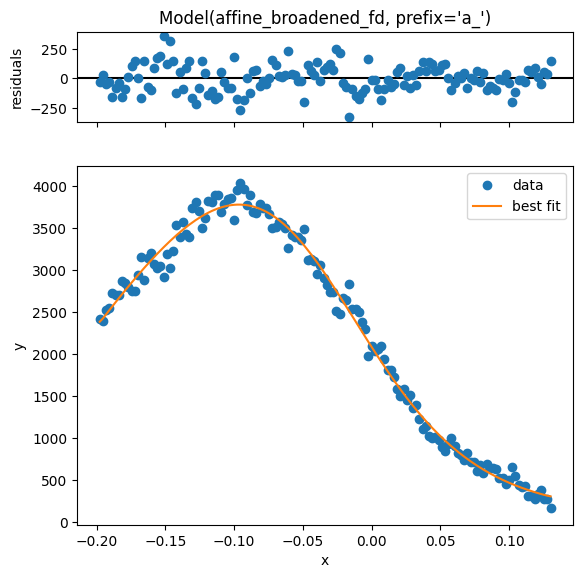

In [13]:
sp6.plot()

In [14]:
type(sp6)

lmfit.model.ModelResult

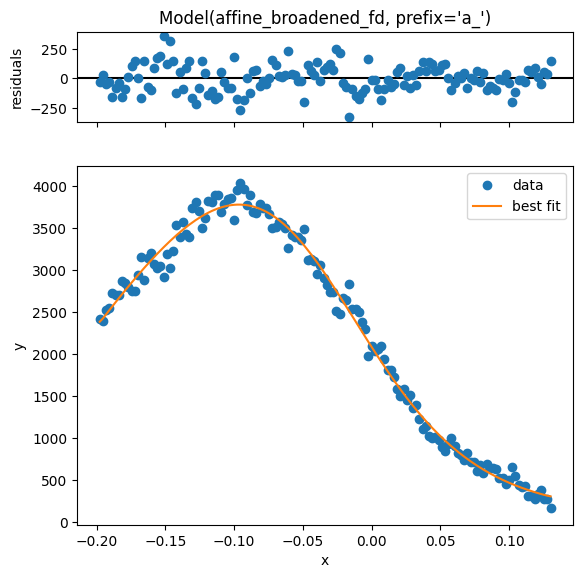

In [15]:
fig = sp6.plot()

In [16]:
sp6.plot?

Signature:
sp6.plot(
    datafmt='o',
    fitfmt='-',
    initfmt='--',
    xlabel=None,
    ylabel=None,
    yerr=None,
    numpoints=None,
    fig=None,
    data_kws=None,
    fit_kws=None,
    init_kws=None,
    ax_res_kws=None,
    ax_fit_kws=None,
    fig_kws=None,
    show_init=False,
    parse_complex='abs',
    title=None,
)
Docstring:
Plot the fit results and residuals using matplotlib.

The method will produce a matplotlib figure (if package available)
with both results of the fit and the residuals plotted. If the fit
model included weights, errorbars will also be plotted. To show
the initial conditions for the fit, pass the argument
``show_init=True``.

Parameters
----------
datafmt : str, optional
    Matplotlib format string for data points.
fitfmt : str, optional
    Matplotlib format string for fitted curve.
initfmt : str, optional
    Matplotlib format string for initial conditions for the fit.
xlabel : str, optional
    Matplotlib format string for labeling the x-axis.

<Axes: title={'center': "Model(affine_broadened_fd, prefix='a_')"}, xlabel='x', ylabel='y'>

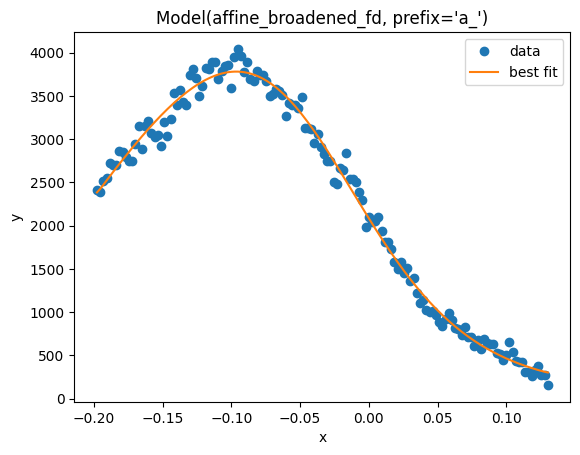

In [17]:
sp6.plot_fit()

<Axes: title={'center': "Model(affine_broadened_fd, prefix='a_')"}, ylabel='residuals'>

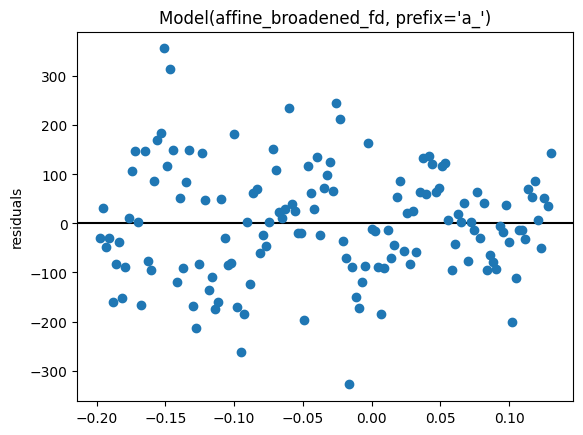

In [18]:
sp6.plot_residuals()

In [21]:
fit_results.F.parameter_names

{'a_const_bkg',
 'a_conv_width',
 'a_fd_center',
 'a_fd_width',
 'a_lin_bkg',
 'a_offset'}

In [ ]:
fit_results.residual